# Import all useful Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
car_df = pd.read_csv('car data.csv')

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_df.shape

(301, 9)

In [5]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Checking the distribution of categorical data
print(car_df.Fuel_Type.value_counts())
print('-----------------------------------------------------------------------------------------------------------------------')
print(car_df.Selling_type.value_counts())
print('-----------------------------------------------------------------------------------------------------------------------')
print(car_df.Transmission.value_counts())
print('-----------------------------------------------------------------------------------------------------------------------')
print(car_df.Car_Name.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-----------------------------------------------------------------------------------------------------------------------
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
-----------------------------------------------------------------------------------------------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
-----------------------------------------------------------------------------------------------------------------------
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [9]:
# Encoding "Fuel_Type" Column
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# Encoding "Seller_Type" Column
car_df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# Encoding "Transmission" Column
car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


C:\Users\Dell\AppData\Local\Temp\ipykernel_15204\3104349393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_df.corr(),annot=True)


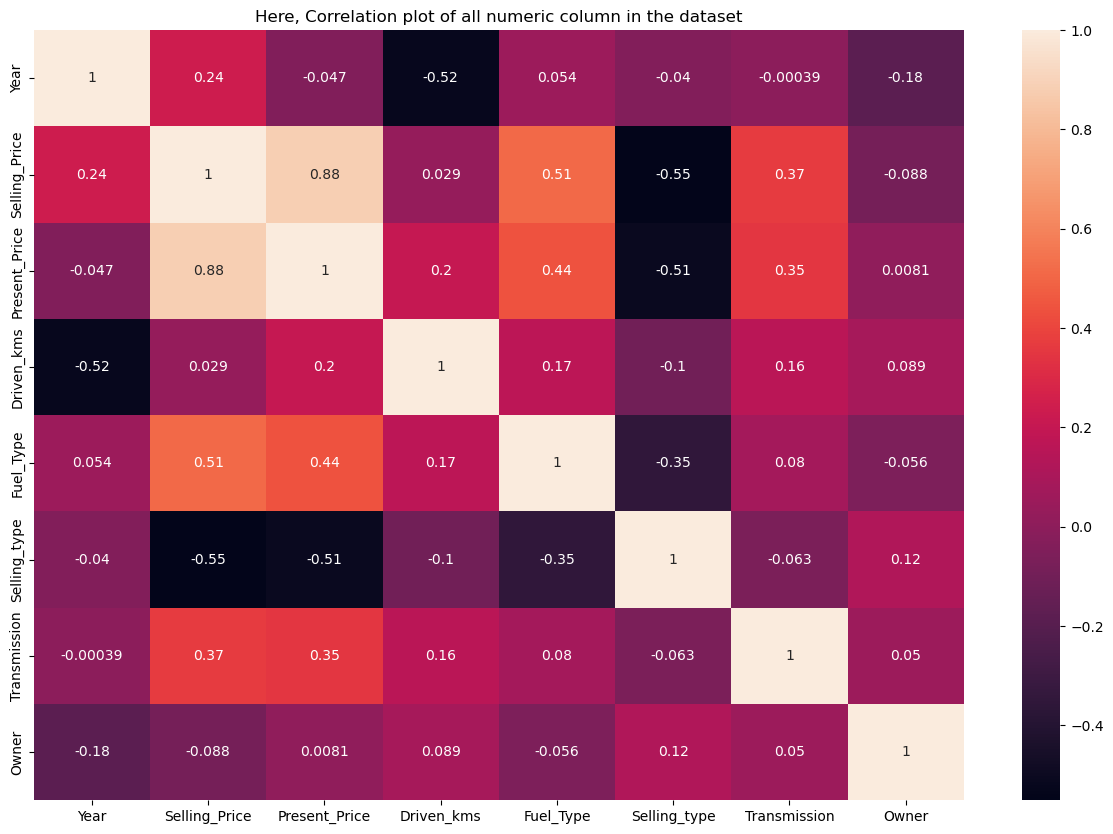

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(car_df.corr(),annot=True)
plt.title("Here, Correlation plot of all numeric column in the dataset")
plt.show()

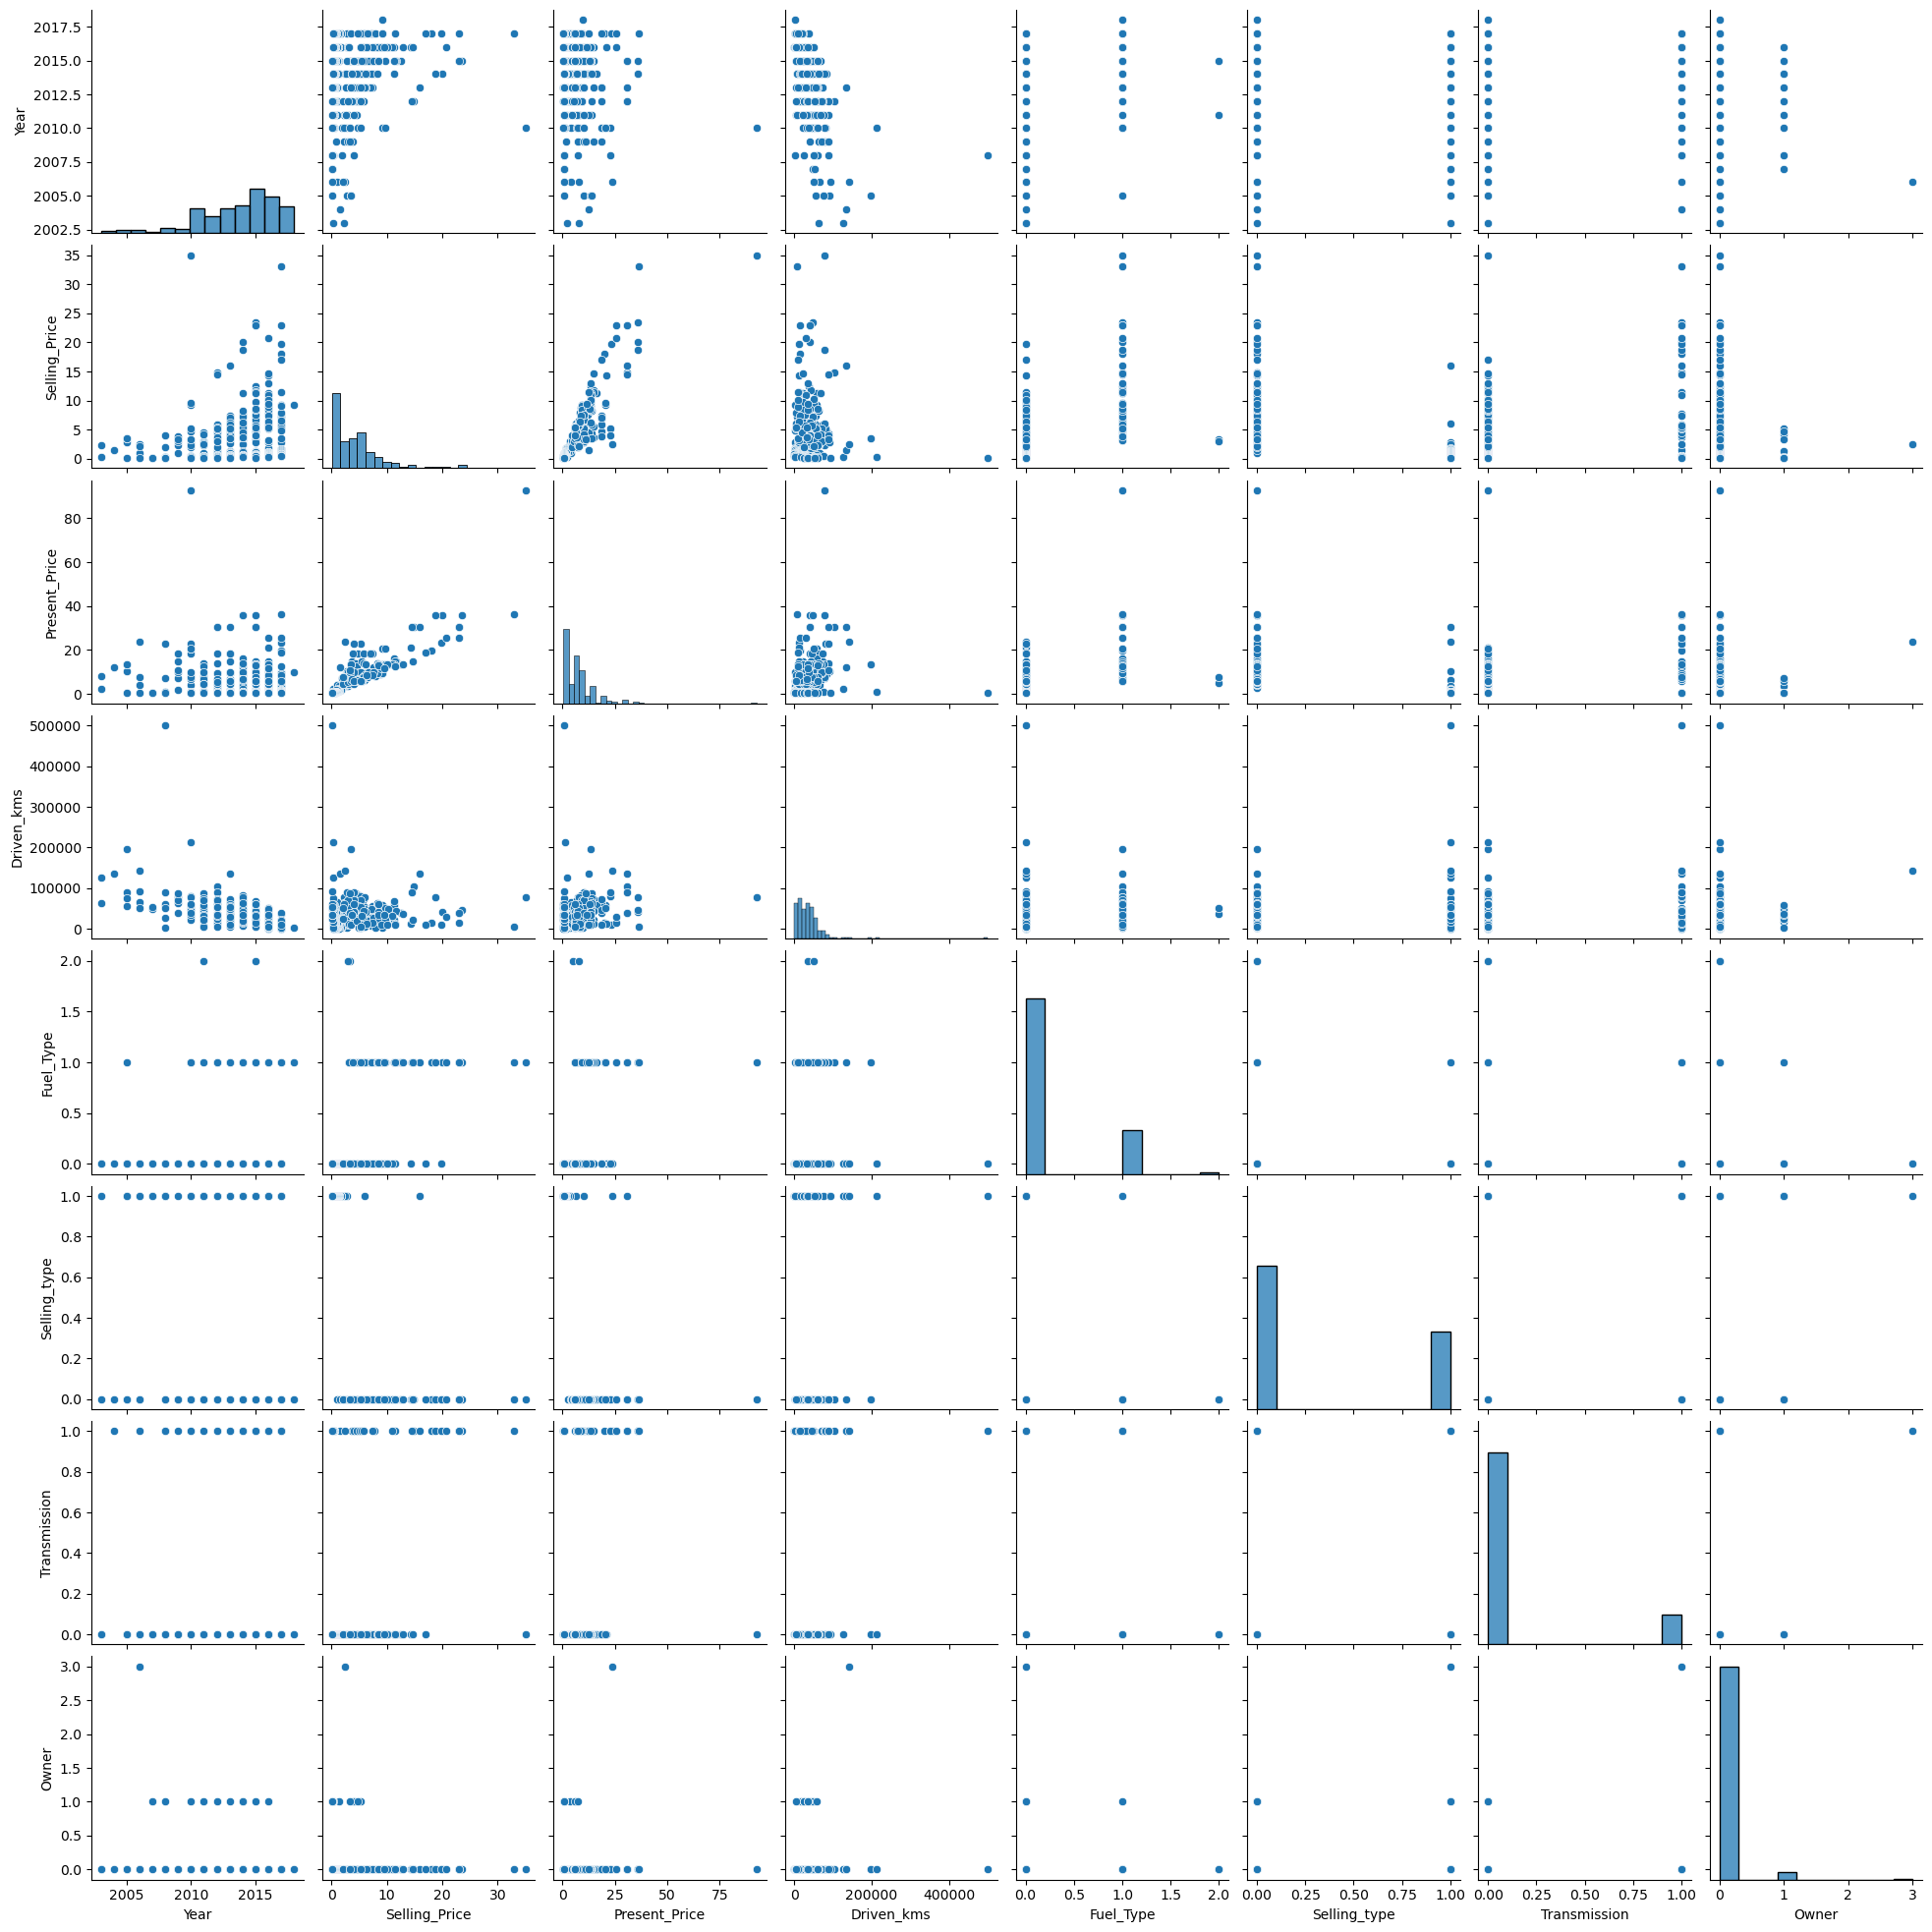

In [11]:
sns.pairplot(car_df)

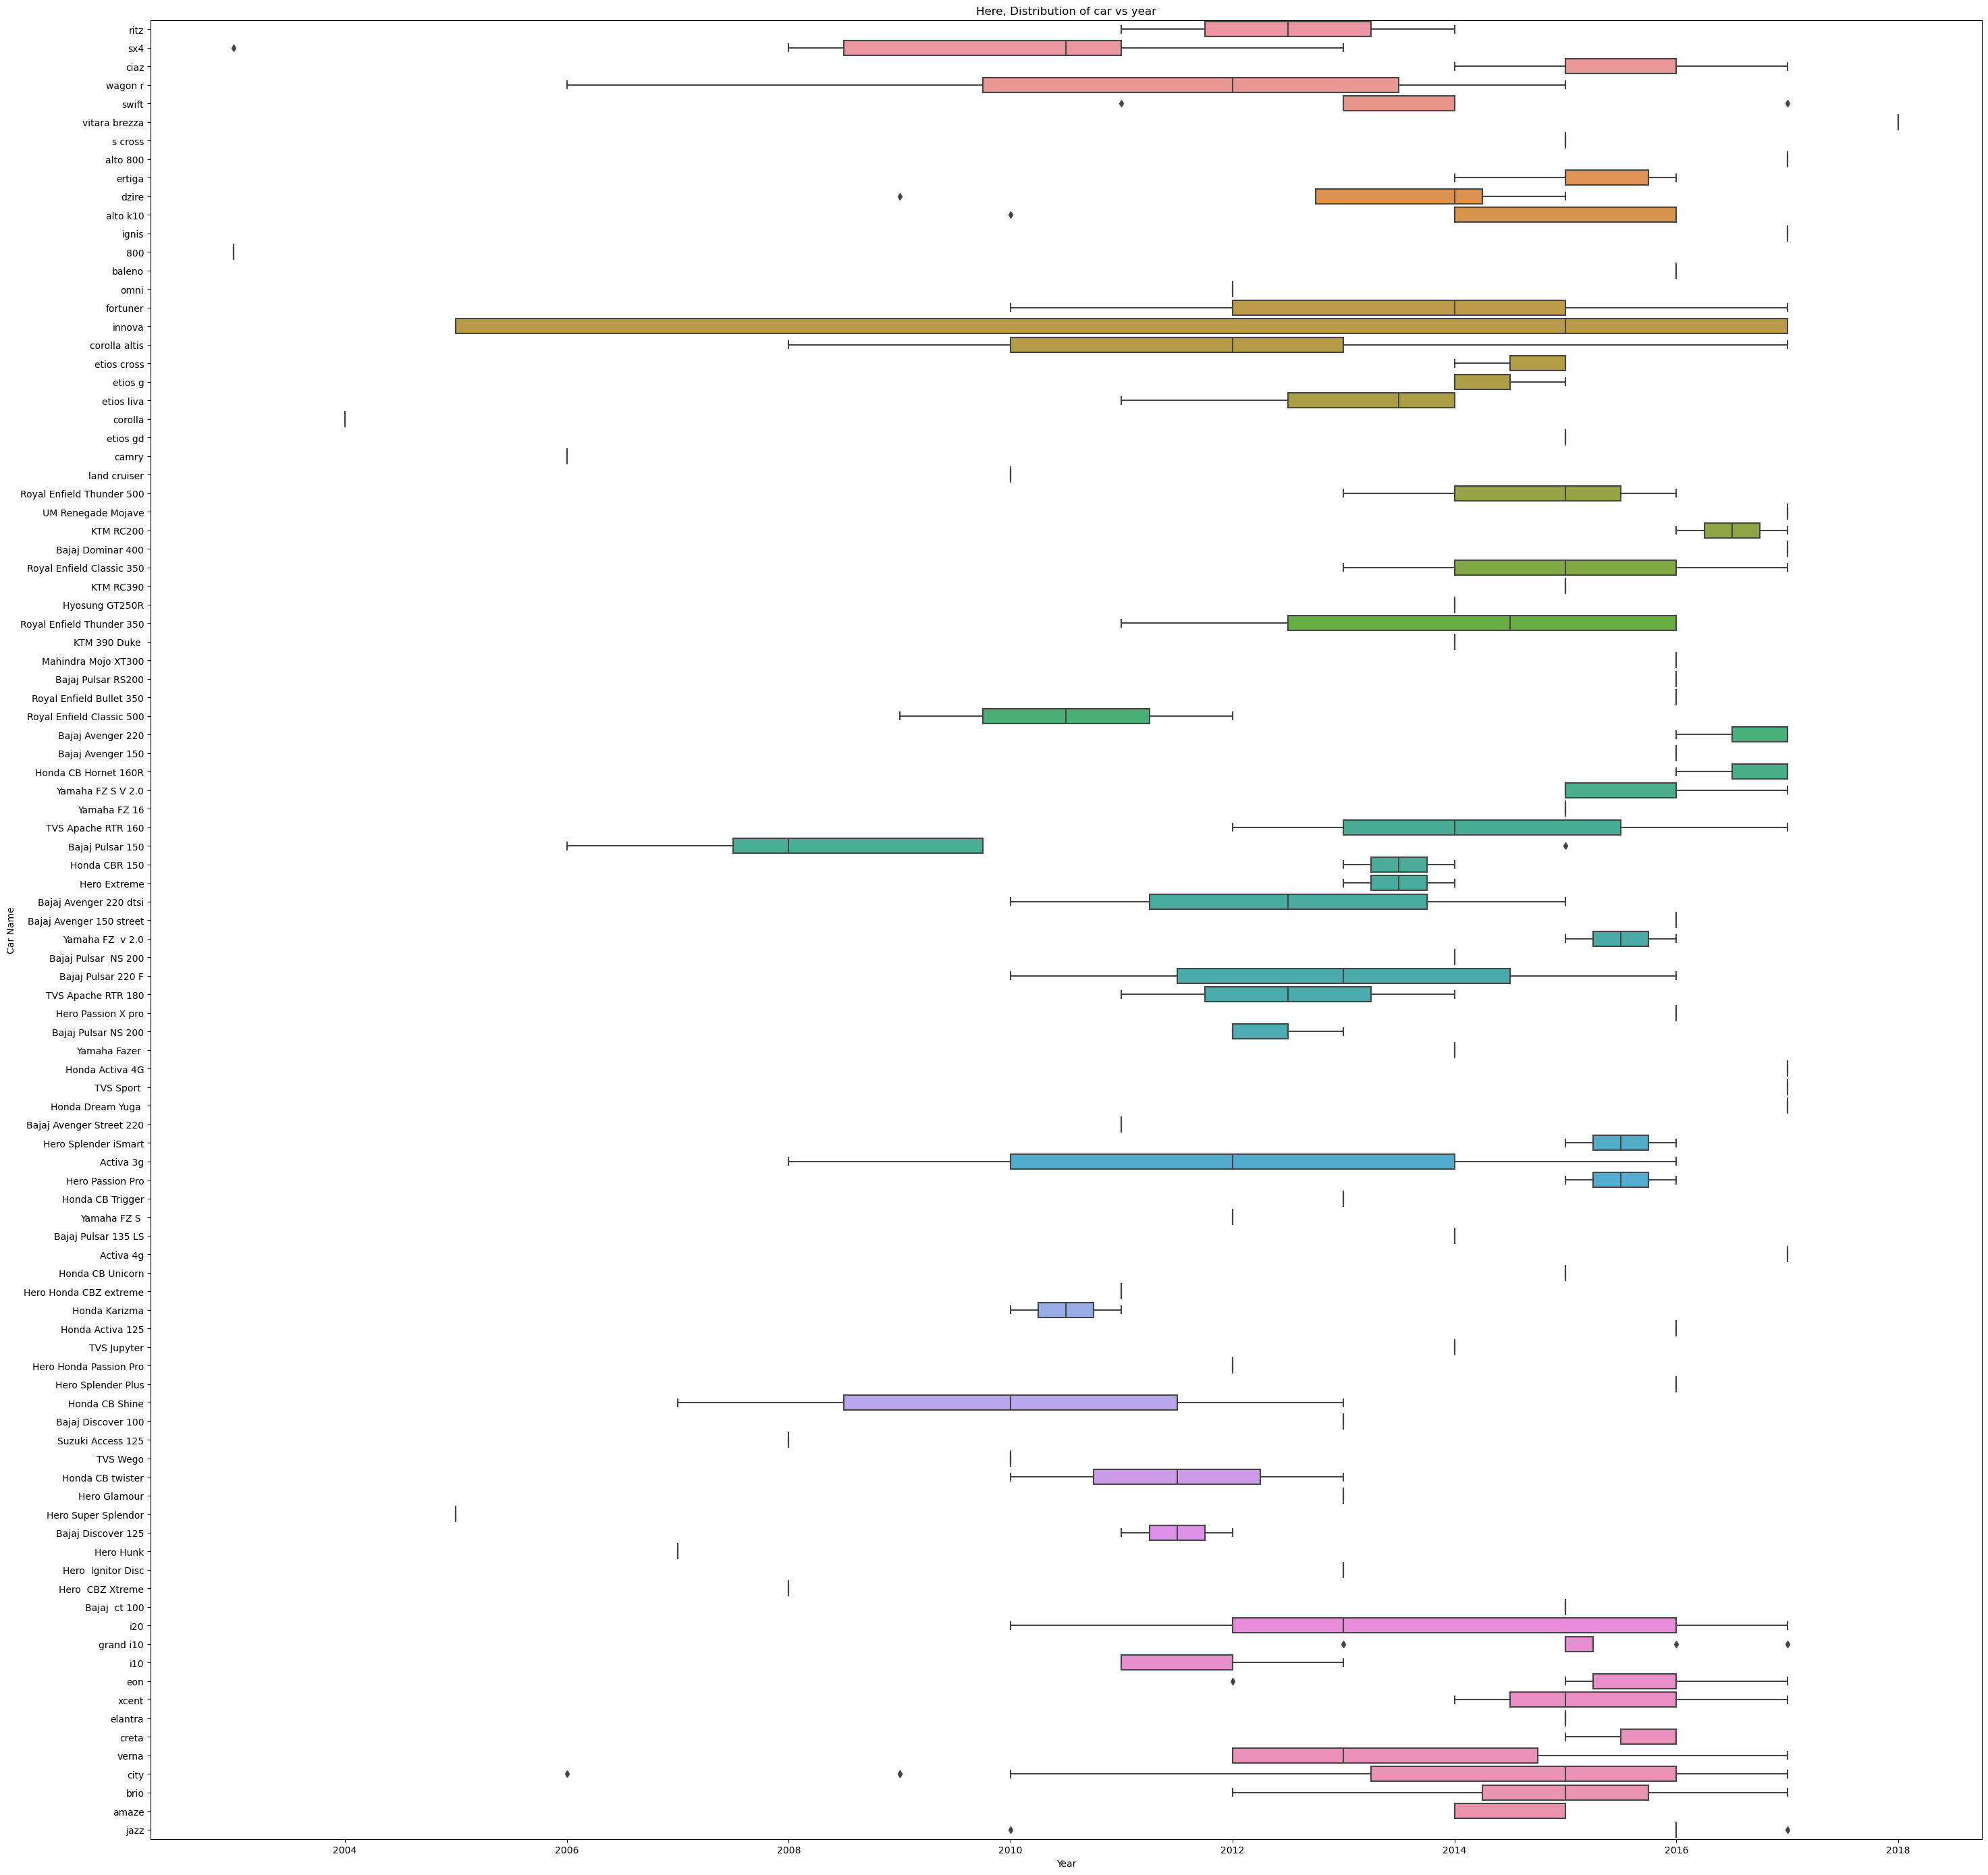

In [12]:
plt.figure(figsize=(35, 35))
sns.boxplot(x=car_df['Year'], y=car_df['Car_Name'])
plt.xlabel('Year')
plt.ylabel('Car Name')
plt.title('Here, Distribution of car vs year')
plt.show()

Year                Axes(0.125,0.747241;0.133621x0.132759)
Selling_Price    Axes(0.285345,0.747241;0.133621x0.132759)
Present_Price     Axes(0.44569,0.747241;0.133621x0.132759)
Driven_kms       Axes(0.606034,0.747241;0.133621x0.132759)
Fuel_Type        Axes(0.766379,0.747241;0.133621x0.132759)
Selling_type        Axes(0.125,0.587931;0.133621x0.132759)
Transmission     Axes(0.285345,0.587931;0.133621x0.132759)
Owner             Axes(0.44569,0.587931;0.133621x0.132759)
dtype: object

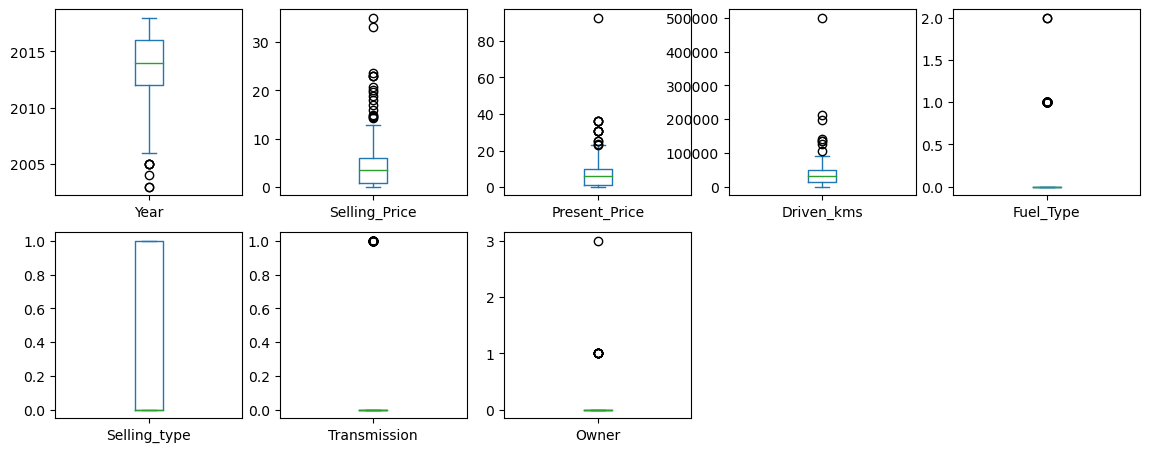

In [13]:
car_df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(14, 14))

In [14]:
NoCS = car_df.drop(['Car_Name','Selling_Price'],axis=1)
Sell = car_df['Selling_Price']

In [15]:
print(NoCS)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [16]:
print(Sell)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
NoCS_train, NoCS_test, Sell_train, Sell_test = train_test_split(NoCS, Sell, test_size = 0.19, random_state=2)

In [18]:
st=StandardScaler()
NoCS_train=st.fit_transform(NoCS_train)
NoCS_test=st.transform(NoCS_test) 
car_model= LinearRegression()
car_model.fit(NoCS_train,Sell_train)

LinearRegression()

In [19]:
Sell_pred=car_model.predict(NoCS_test)

In [20]:
DTR_model = DecisionTreeRegressor(max_depth=9,random_state=0)
DTR_model.fit(NoCS_train,Sell_train)
Sell_pred2 = DTR_model.predict(NoCS_test)
print('Accuracy of this model is:',DTR_model.score(NoCS_test, Sell_test)*100)

Accuracy of this model is: 95.05497822215236
